# Proyek Pertama : Menyelesaikan Permasalahan Human Resources (HR)

- Nama: Lusi Aulia Jati
- Email: lusiauliajati@gmail.com
- ID Dicoding: lusiaulia

#### Background

Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. 

Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Untuk mencegah hal ini semakin parah, manajer departemen HR ingin meminta bantuan Anda mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut. Selain itu, ia juga meminta Anda untuk membuat business dashboard untuk membantunya memonitori berbagai faktor tersebut.

#### Objective
Proses identifikasi faktor yang mempengaruhi akan dilakukan pada file jupyter notebook ini, sedangkan proses pembuatan dashboard akan dilakukan menggunakan bantuan Tableau.

Tidak hanya identifikasi faktor mempengaruhi, namun juga pada file jupyter notebook ini akan dibuat model untuk prediksi hasil nilai Attrition (apakah karyawan terindikasi untuk keluar atau tidak)

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


### Menyiapkan data yang akan digunakan

In [2]:
employee_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv", 
                          encoding='windows-1252')
employee_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


## Data Understanding

In [3]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
employee_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Preparation / Preprocessing

In [5]:
employee_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [6]:
f"Persentase data kosong pada kolom attrition : {(412/1470)*100}%"

'Persentase data kosong pada kolom attrition : 28.027210884353742%'

In [7]:
print(employee_df.Attrition.value_counts())

0.0    879
1.0    179
Name: Attrition, dtype: int64


In [8]:
f"Persentase attrition rate : {(179/1470)*100}%"

'Persentase attrition rate : 12.176870748299319%'

Benar bahwa persentase attrition sebesar 12.1% > 10% terhadap seluruh karyawan. 

Menimbang terdapat data kosong pada kolom Attrition sebesar 28.02% maka dapat dilakukan langkah-langkah berikut sebagai pilihan 

Case 1 : Terdapat data kosong pada kolom attrition sebesar 28,02%, merupakan angka yang cukup besar.  Juga karena perhitungan persentase karyawan yang keluar sebesar lebih dari 10% juga memperhitungkan seluruh karyawan sehingga dibuat 1 label baru untuk data kosong. Yakni 2.0 : Tidak teridentifikasi

Case 2 : Data kosong dihapus,  menyisakan label 1.0 dan 0.0

Case 3 : Data kosong dapat diisi dengan 0.0 , dengan asumsi hanya karyawan berlabel 1.0 saja yang akan keluar dari perusahaan

akan digunakan case 3

In [9]:
employee_df["Attrition"] = employee_df["Attrition"].replace(np.nan, 0.0)

In [10]:
employee_df.dropna(inplace=True)
employee_df.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

<!-- Total data menjadi 1048 data -->

In [12]:
employee_df["Attrition"] = employee_df["Attrition"].astype(np.int64)

In [13]:
employee_df.dtypes
#findCOlumnTypes()

column_categ  = employee_df.select_dtypes(['object']).columns

column_num  = employee_df.select_dtypes(['int64']).columns

print(column_categ)
print(column_num)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [14]:
for col in column_categ:
    print(employee_df[col].value_counts())
    print("------------------------------")

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------
Male      882
Female    588
Name: Gender, dtype: int64
------------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
------------------------------
Married     673
Single      470
Divorced    327
Name

C:\Users\lusia\AppData\Local\Temp\ipykernel_3660\2753554701.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = employee_df.corr()


<Axes: >

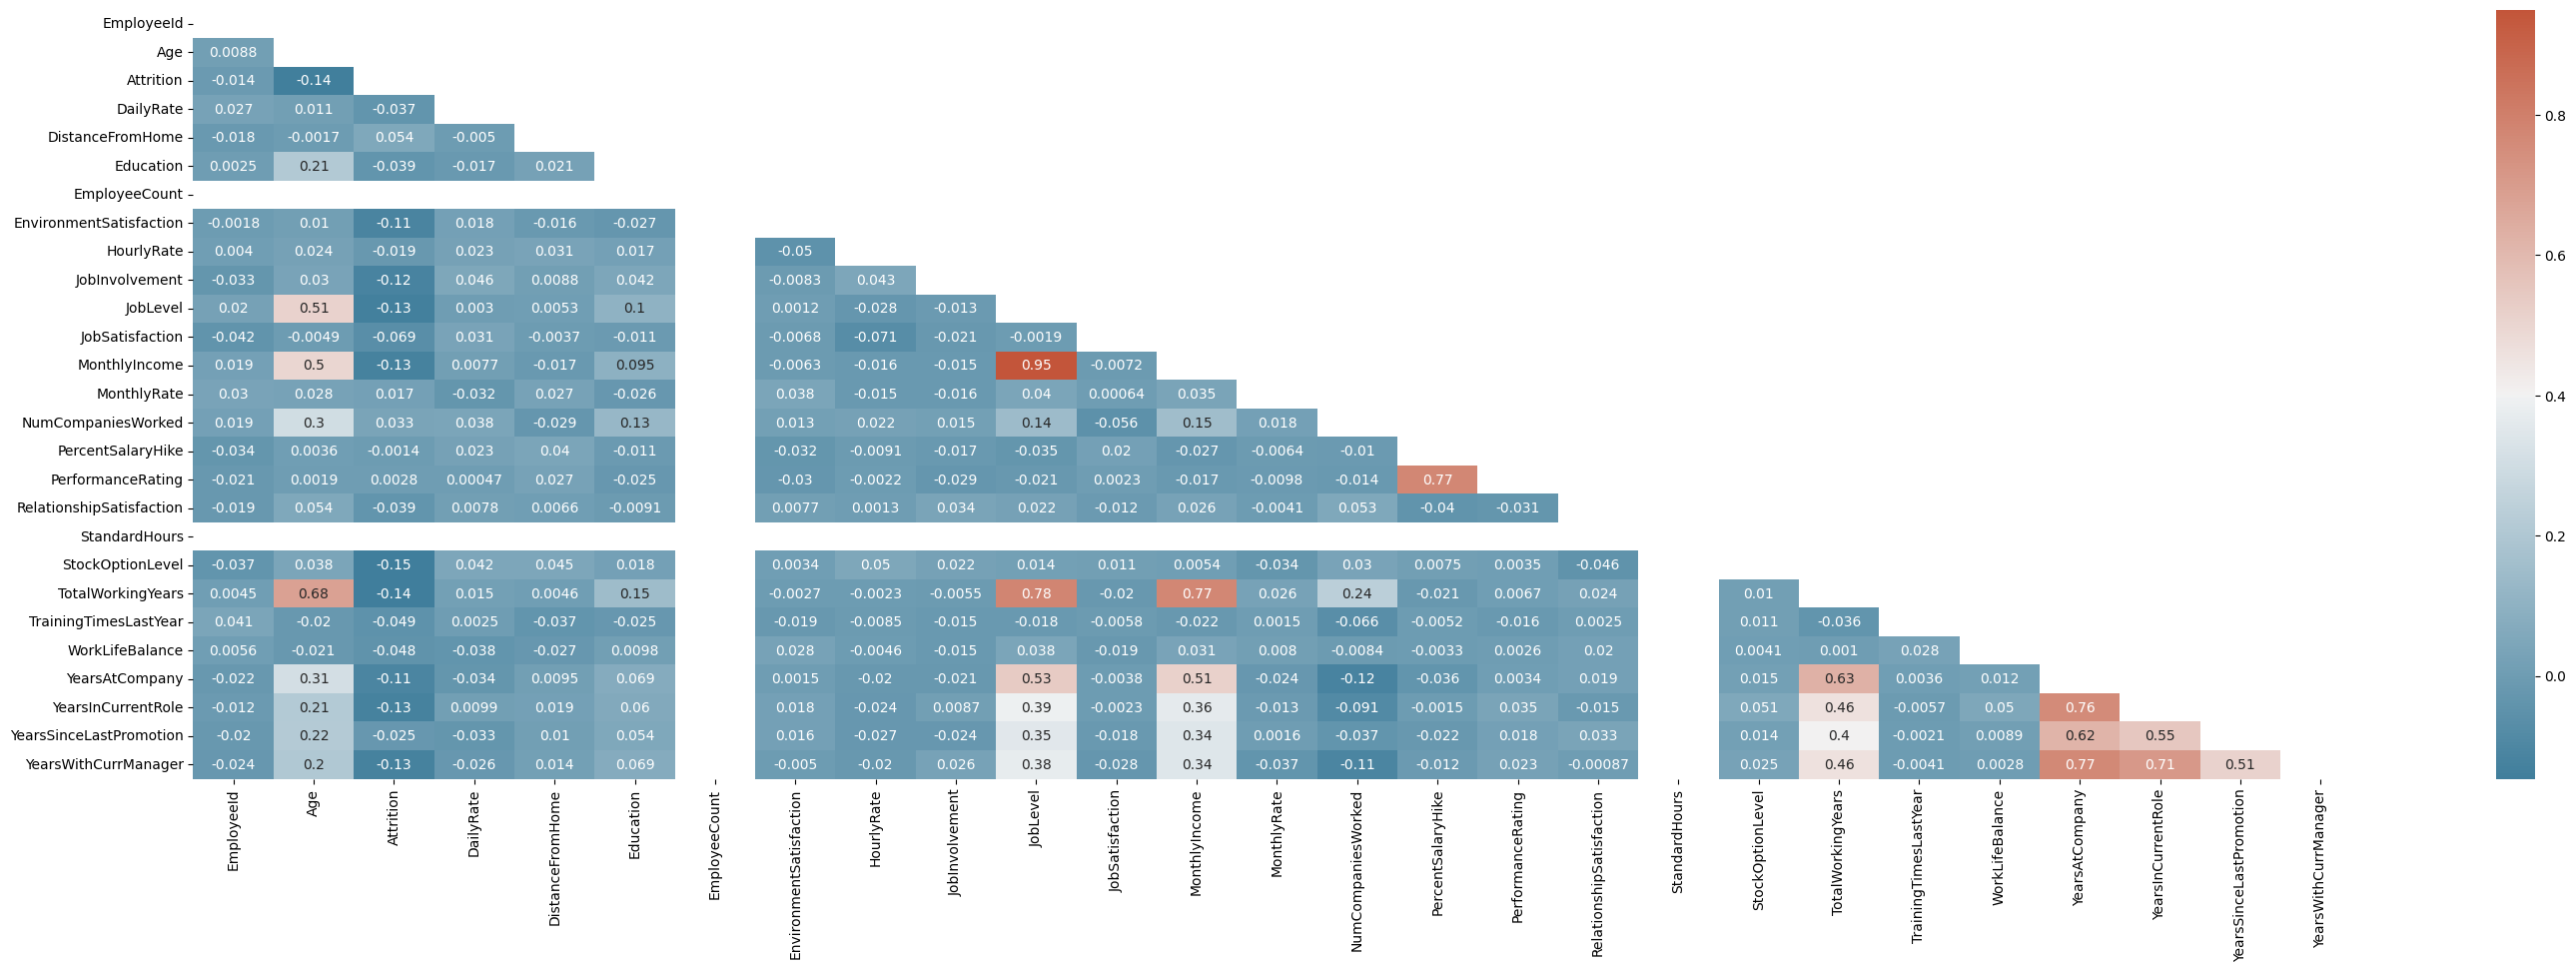

In [15]:
corr = employee_df.corr()

f, ax = plt.subplots(figsize=(35, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Terlihat pada data EmployeeCount dan data StandardHours tidak memiliki korelasi dengan data manapun. Kedepan, kedua data ini tidak digunakan. Sementara pada data years semua memiliki korelasi bagus, akan dipilih salah satu yaitu YearsAtCompany

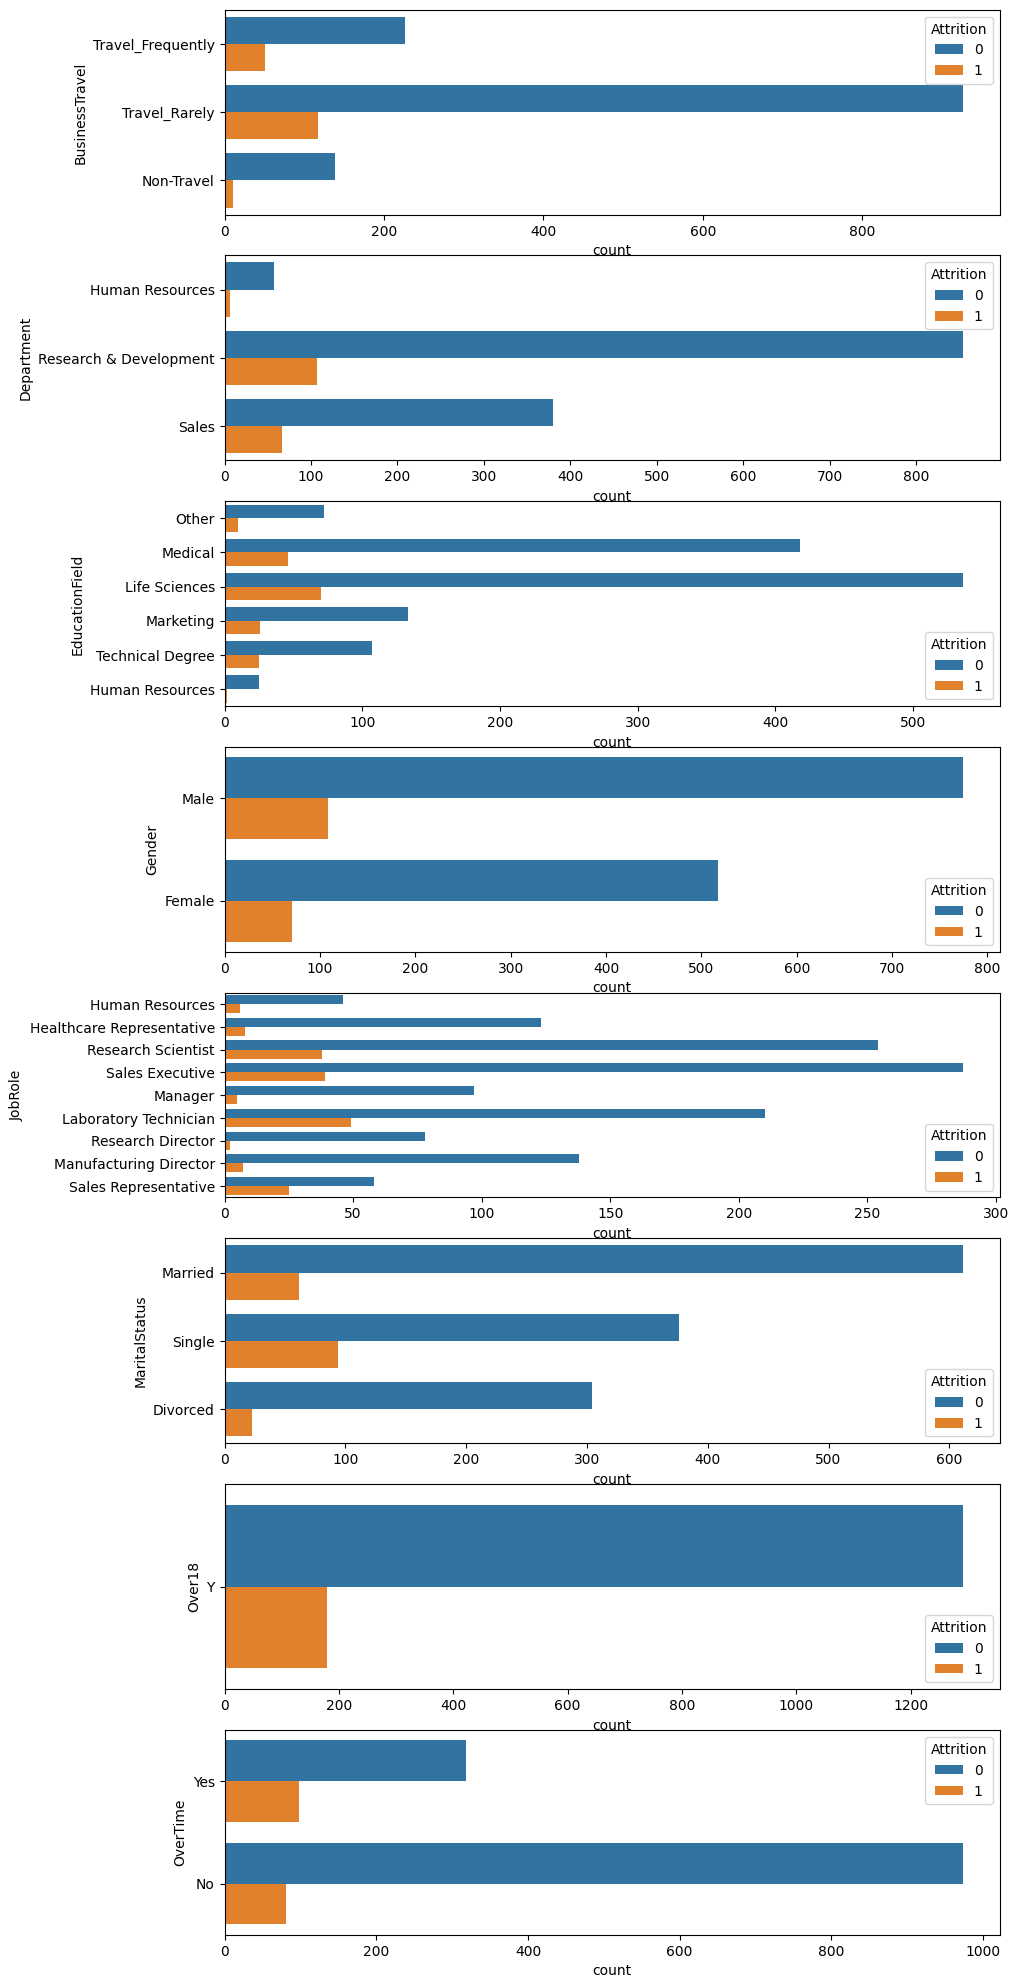

In [16]:
fig, ax = plt.subplots(len(column_categ), 1,figsize=(10,25))

for i, feature in enumerate(column_categ):
  sns.countplot(data=employee_df, y = column_categ[i], hue = 'Attrition', ax=ax[i])
plt.show()

* Business Travel akan diubah menjadi data numerik, Travel_Rarely:0, Travel_Frequently:1, dan Non-Travel:2
* Department -->  Research & Development : 0, Sales:1, Human Resources:2
* EducationField -> Medical : 0, Life Sciences : 1, Marketing : 2, Techincal Degree : 3, Human Resources : 4, Other : 5
* JobRole --> Healthcare Representative : 0, Research Scientist : 1, Sales Executive : 2, Manager : 3, Laboratory Technician : 4, Research Director : 5, Manufacturing Director : 6, Human Resources : 7, Sales Representative : 8
* Marital Status --> Married : 0, Single : 1, Divorced : 2
* OverTime --> No : 0, Yes : 1
* Pada data Over18 semua menjawab 'Yes'

In [17]:
employee_df = employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'YearsInCurrentRole',
                                'YearsSinceLastPromotion','YearsWithCurrManager', 'TotalWorkingYears'], axis = 1)
employee_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,1,38,0,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,5224,0,Yes,11,3,2,1,2,3,6
1,2,37,1,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,14382,5,No,15,3,1,0,2,1,1
2,3,51,1,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,10332,9,Yes,12,3,3,3,2,4,10
3,4,42,0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,14864,5,No,14,3,4,1,2,4,20
4,5,40,0,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,12549,2,No,14,3,2,3,2,3,5


In [18]:
# employee_df.to_csv("data_hr.csv")

## Modeling

In [19]:
column_categ  = employee_df.select_dtypes(['object']).columns
column_categ

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [20]:
def transform_business(value):
    if value == "Travel_Rarely":
        return 0
    elif value == "ravel_Frequently" :
        return 1
    else:
        return 2

def transform_gender(value):
    if value == "Male":
        return 0
    elif value == "Female" :
        return 1
    else:
        return 2

def transform_field(value):
    if value == "Medical":
        return 0
    elif value == "Life Sciences" :
        return 1
    elif value == "Marketing" :
        return 2
    elif value == "Techincal Degree" :
        return 3
    elif value == "Human Resources" :
        return 4
    else :
        return 5

def transform_role(value):
    if value == "Healthcare Representative":
        return 0
    elif value == "Research Scientist" :
        return 1
    elif value == "Sales Executive" :
        return 2
    elif value == "Manager" :
        return 3
    elif value == "Laboratory Technician" :
        return 4
    elif value == "Research Director" :
        return 5
    elif value == "Manufacturing Director " :
        return 6
    elif value == "Human Resources" :
        return 7
    else :
        return 8

def transform_depart(value):
    if value == "Research & Development":
        return 0
    elif value == "Sales" :
        return 1
    else:
        return 2
    
def transform_marital(value):
    if value == "Married":
        return 2
    elif value == "Single" :
        return 1
    else:
        return 0
    
def transform_overtime(value):
    if value == "Yes":
        return 1
    else:
        return 0

In [21]:
employee_df["BusinessTravel"] = employee_df["BusinessTravel"].map(transform_business)
employee_df["Department"] = employee_df["Department"].map(transform_depart)
employee_df["MaritalStatus"] = employee_df["MaritalStatus"].map(transform_marital)
employee_df["OverTime"] = employee_df["OverTime"].map(transform_overtime)
employee_df["EducationField"] = employee_df["EducationField"].map(transform_field)
employee_df["JobRole"] = employee_df["JobRole"].map(transform_role)
employee_df["Gender"] = employee_df["Gender"].map(transform_gender)

In [22]:
employee_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,1,38,0,2,1444,2,1,4,5,4,...,5224,0,1,11,3,2,1,2,3,6
1,2,37,1,0,1141,0,11,2,0,1,...,14382,5,0,15,3,1,0,2,1,1
2,3,51,1,0,1323,0,4,4,1,1,...,10332,9,1,12,3,3,3,2,4,10
3,4,42,0,2,555,1,26,3,2,3,...,14864,5,0,14,3,4,1,2,4,20
4,5,40,0,0,1194,0,2,4,0,3,...,12549,2,0,14,3,2,3,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0,0,168,0,1,3,1,3,...,15397,4,1,14,3,4,0,4,4,1
1466,1467,50,0,0,813,0,17,5,1,4,...,21981,5,0,15,3,3,3,3,3,14
1467,1468,28,1,0,1485,0,12,1,1,3,...,22955,1,1,11,3,4,0,4,2,1
1468,1469,40,0,2,458,0,16,2,1,3,...,8532,9,0,16,3,2,1,0,3,4


In [23]:
features_complete = ['Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime']

In [24]:
from scipy.stats import ttest_ind

for i in features_complete :
    attrition_group = employee_df[employee_df['Attrition'] == 1][i]
    non_attrition_group = employee_df[employee_df['Attrition'] == 0][i]
    t_stat, p_value = ttest_ind(attrition_group, non_attrition_group)
    print(f" {i} >> T-Statistic: {t_stat} , P-Value: {p_value}")
    print("-------------------------------------------")

 Age >> T-Statistic: -5.451162981135475 , P-Value: 5.862215479092255e-08
-------------------------------------------
 DailyRate >> T-Statistic: -1.4151138869166147 , P-Value: 0.1572471960584157
-------------------------------------------
 DistanceFromHome >> T-Statistic: 2.0736568081681708 , P-Value: 0.03828522470607299
-------------------------------------------
 Education >> T-Statistic: -1.5125006884612695 , P-Value: 0.1306217765027629
-------------------------------------------
 EnvironmentSatisfaction >> T-Statistic: -4.345507662871371 , P-Value: 1.4850590844864578e-05
-------------------------------------------
 JobInvolvement >> T-Statistic: -4.588227447146305 , P-Value: 4.851080473931488e-06
-------------------------------------------
 JobLevel >> T-Statistic: -5.193135147947673 , P-Value: 2.3580381523053333e-07
-------------------------------------------
 JobSatisfaction >> T-Statistic: -2.6387947142658934 , P-Value: 0.008408155000267009
---------------------------------------

Menggunakan uji t-test dan nilai signifikansi 0.05 maka akan dipilih fitur untuk tahap prediksi, terlihat fitur yang memiliki p-value kurang dari 0.05 yaitu : 'Age', 'EnvironmentSatisfaction', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'YearsAtCompany', 'OverTime'. Artinya ada perbedaan yang signifikan dalam data-data dengan p-value <005 dengan karyawan yang mengalami attrition dan yang tidak.

In [25]:
features = ['Age', 'EnvironmentSatisfaction', 'DistanceFromHome', 'JobInvolvement', 
            'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'YearsAtCompany', 'OverTime']

In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    employee_df[features],
    employee_df["Attrition"],
    test_size=0.2,
    random_state=0
)

In [27]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1176, 10), (294, 10), (1176,), (294,))

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

c:\users\lusia\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

In [29]:
predictions = model.predict(X_val)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
result = f1_score(predictions,y_val, average='micro')
print("F1 Score: %.3f%%" % (result*100.0))

F1 Score: 83.673%


## Save Model

In [31]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)